In [ ]:
# TODO:
# Create a function that takes the logits, image id and text description
# Might use the image ids and text description as x/y labels (too much if n=64?)

/local/abdel/mmg-clip/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


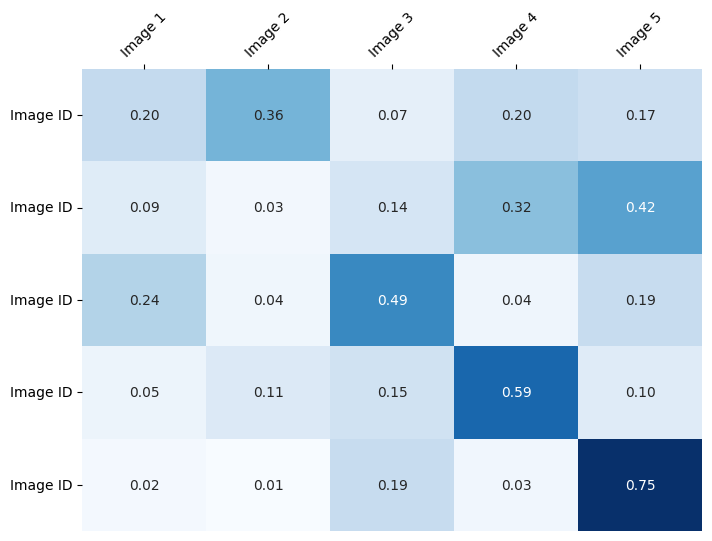

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

logits_tensor = torch.randn(5, 5)

# Apply softmax to convert logits to probabilities
probs_tensor = torch.softmax(logits_tensor, dim=1)

# Example list of text for y-axis labels
x_labels = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5']
y_labels = ['Image ID', 'Image ID', 'Image ID', 'Image ID', 'Image ID']

# Convert tensor to numpy array
probs_array = probs_tensor.detach().numpy()

# Plot heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(probs_array, 
                 cmap='Blues', 
                 annot=True, 
                 fmt=".2f", 
                 xticklabels=x_labels, 
                 yticklabels=y_labels, 
                 cbar=False)
ax.xaxis.tick_top()

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


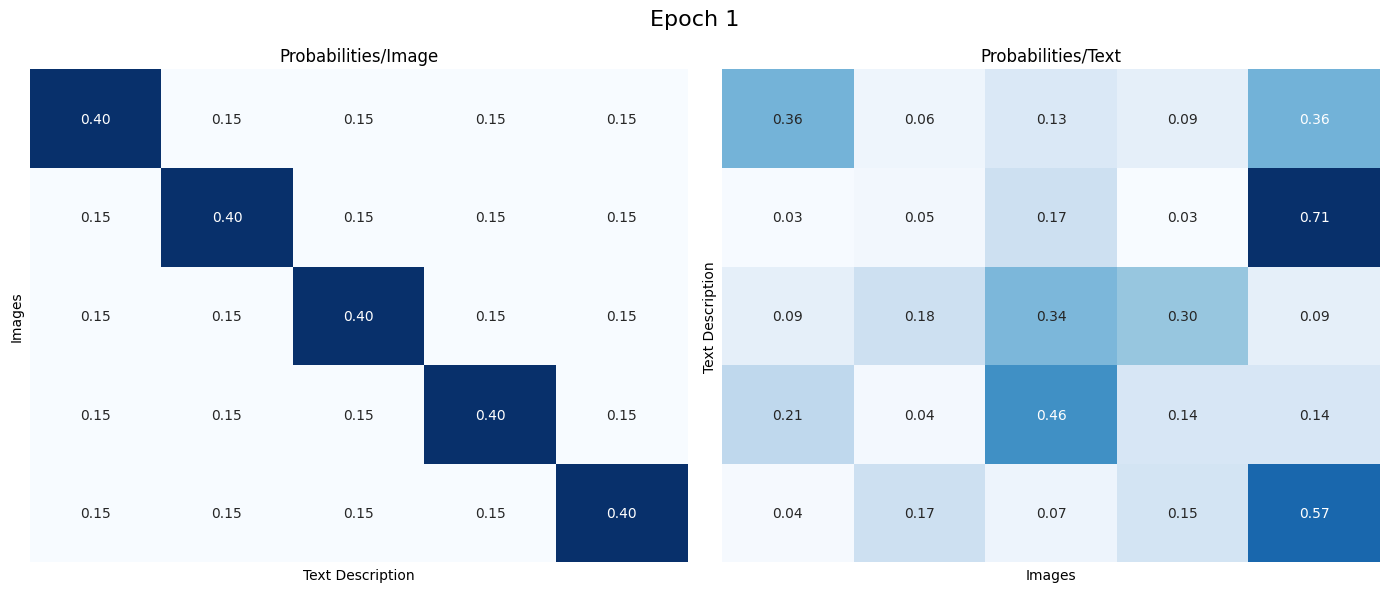

In [25]:
def plot_logits_tensorboard(logits_per_image, logits_per_text, suptitle=None, writer = None):

    '''Logs logits probabilities to tensorboard as heatmaps, for both logits/image and logits/text. Note that the heatmaps are 
    normalized using a softmax.
    
    Args:
        logits_per_image (tensor): an [n, n] tensor representing the logits_per_image (rows: images, cols: text description).
        logtis_per_text (tensor): an [n, n] tensor representing the logits_per_text (rows: text description, cols: images).
        suptitle (str): subplot title.
        writer (SummaryWriter): writer instance to for logging.
    
    Returns:
        None
    '''

    if writer is None:
        raise ValueError("Missing tensorboard writer.")
    
    # Apply softmax to convert from logits to probabilities 
    probs_per_image = torch.softmax(logits_per_image, dim=1)
    probs_per_text = torch.softmax(logits_per_text, dim=1)

    # Convert tensors to numpy
    probs_per_image = probs_per_image.detach().numpy()
    probs_per_text = probs_per_text.detach().numpy()

    # Create a subplot grid
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Plot heatmap 1
    sns.heatmap(probs_per_image, cmap='Blues', annot=True, fmt=".2f", xticklabels=False, yticklabels=False, ax=axes[0], cbar=False)
    axes[0].set_title('Probabilities/Image')
    axes[0].set_xlabel('Text Description')
    axes[0].set_ylabel('Images')
    axes[0].xaxis.tick_top()

    # Plot heatmap 2
    sns.heatmap(probs_per_text, cmap='Blues', annot=True, fmt=".2f", xticklabels=False, yticklabels=False, ax=axes[1], cbar=False)
    axes[1].set_title('Probabilities/Text')
    axes[1].set_xlabel('Images')
    axes[1].set_ylabel('Text Description')
    axes[1].xaxis.tick_top()
    
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    plt.suptitle(suptitle, fontsize=16)
    plt.tight_layout()
    plt.show()


# Example tensors with logits
logits_tensor_1 = torch.eye(5, 5)  # [n, n]
logits_tensor_2 = torch.randn(5, 5)  # [n, n]

# Example list of text for y-axis labels
y_labels = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5']

plot_logits_tensorboard(logits_per_image=logits_tensor_1, logits_per_text=logits_tensor_2, suptitle="Epoch 1")
